In [1]:
import matplotlib.pyplot as plt
import numpy as np
import yaml
import h5py

import sys

sys.path.append("../lib/")
from figparams import *
from utils import *

plt.rcParams.update(rc_params)

In [2]:
label = [
    "alpha",
    "amp",
    "fknee",
    "fr1",
    "fr2",
    "lat",
    "long",
    "psi",
    "s1",
    "s2",
    "A",
    "P",
]

colors = get_colormap_colors(24, "cividis")
label_plot = [
    "$\\alpha$",
    "$\\mathcal{A}$",
    "$f_{\\mathrm{knee}}$",
    "$f_{1}$",
    "$f_{2}$",
    "$\\sin \\beta$",
    "$\\lambda$",
    "$\\sin \\psi$",
    "$\\sigma_1^2$",
    "$\\sigma_2^2$",
    "$\\mathcal{P}_{\\mathrm{tm}}$",
    "$\\mathcal{P}_{\\mathrm{oms}}$",
]


In [3]:
# read hmc samples
import glob

samples_cyclo_all_hmc = []
mode = "cyclo"
for i in range(24):
    pack_id = i + 1
    folder = f"../data/first_year_twoweeks/pack_{pack_id}/hmc/Gamma/cyclo/temp_16/"

    # Grab all chain files
    files = sorted(
        glob.glob(folder + f"thinned_chain_*_pack_{pack_id}_Gamma_cyclo_temp_16.csv")
    )

    posterior = []

    for file in files:
        result = np.genfromtxt(file, delimiter=",", names=True)

        # Extract parameter names from header
        parameter_names_old = list(result.dtype.names)
        parameter_names = [n.split("_")[-1] for n in parameter_names_old]

        chain_length = len(result[parameter_names_old[0]])

        # Define dtype for structured array (once per file)
        dtype_list = [(j, "f8") for j in parameter_names]
        post = np.zeros(chain_length, dtype=dtype_list)

        # Fill it
        for j in range(len(parameter_names)):
            post[parameter_names[j]] = result[parameter_names_old[j]]

        posterior.append(post)

    # Stack everything vertically
    posterior = np.concatenate(posterior)

    source = f"pack_{i + 1}/nessai/Gamma/{mode}/pec_pack{i + 1}_{mode}.yaml"
    # extract true of source
    # Read the YAML file

    with open(source, "r") as file:
        sources = yaml.safe_load(file)["sources"]

    true = []
    # read true value for labels only
    for cat in sources.values():
        for item in cat:
            if item["name"] in label:
                true.append(item["injected"])

    # Stack values into a 2D array (n_samples, n_params)
    samples = np.vstack([posterior[name] for name in label]).T
    # subtract the true values
    true_as_samples = np.array(true)
    # Reshape the true values to match the shape of samples
    true_as_samples = np.tile(true_as_samples, (samples.shape[0], 1))
    samples_nested = samples  # - true_as_samples
    samples_cyclo_all_hmc.append(samples_nested)

FileNotFoundError: [Errno 2] No such file or directory: 'pack_1/nessai/Gamma/cyclo/pec_pack1_cyclo.yaml'

In [4]:
samples_cyclo_gamma = []
mode = "cyclo"
for i in range(24):
    with h5py.File(
        f"../data/first_year_twoweeks/pack_{i + 1}/nessai/Gamma/{mode}/result.hdf5",
        "r",
    ) as f:
        # Example: access a dataset
        posterior = f["posterior_samples"][:]

    source = f"../data/first_year_twoweeks/pack_{i + 1}/nessai/Gamma/{mode}/pe_pack{i + 1}_{mode}.yaml"
    # extract true of source
    # Read the YAML file

    with open(source, "r") as file:
        sources = yaml.safe_load(file)["sources"]

    true = []
    # read true value for labels only
    for cat in sources.values():
        for item in cat:
            if item["name"] in label:
                true.append(item["injected"])

    # Get the dtype and field names
    dtype = posterior.dtype
    # Stack values into a 2D array (n_samples, n_params)
    samples = np.vstack([posterior[name] for name in label]).T
    # subtract the true values
    true_as_samples = np.array(true)
    # Reshape the true values to match the shape of samples
    true_as_samples = np.tile(true_as_samples, (samples.shape[0], 1))
    samples_nested = samples  # - true_as_samples
    samples_cyclo_gamma.append(samples_nested)

samples_cyclo_whittle = []
mode = "cyclo"
for i in range(24):
    with h5py.File(
        f"../data/first_year_twoweeks/pack_{i + 1}/nessai/Whittle/{mode}/result.hdf5",
        "r",
    ) as f:
        # Example: access a dataset
        posterior = f["posterior_samples"][:]

    source = f"../data/first_year_twoweeks/pack_{i + 1}/nessai/Gamma/{mode}/pe_pack{i + 1}_{mode}.yaml"
    # extract true of source
    # Read the YAML file

    with open(source, "r") as file:
        sources = yaml.safe_load(file)["sources"]

    true = []
    # read true value for labels only
    for cat in sources.values():
        for item in cat:
            if item["name"] in label:
                true.append(item["injected"])

    # Get the dtype and field names
    dtype = posterior.dtype
    # Stack values into a 2D array (n_samples, n_params)
    samples = np.vstack([posterior[name] for name in label]).T
    # subtract the true values
    true_as_samples = np.array(true)
    # Reshape the true values to match the shape of samples
    true_as_samples = np.tile(true_as_samples, (samples.shape[0], 1))
    samples_nested = samples  # - true_as_samples
    samples_cyclo_whittle.append(samples_nested)


In [5]:
pack = range(1, 25)
js_tot = []
for i in pack:
    js_values = jensen_shannon_per_parameter(
        samples_cyclo_gamma[i - 1], samples_cyclo_whittle[i - 1]
    )
    js_values = np.array(js_values)
    js_tot.append(js_values)


Computing JS divergence for 12 parameters
Computing JS divergence for 12 parameters
Computing JS divergence for 12 parameters
Computing JS divergence for 12 parameters
Computing JS divergence for 12 parameters
Computing JS divergence for 12 parameters
Computing JS divergence for 12 parameters
Computing JS divergence for 12 parameters
Computing JS divergence for 12 parameters
Computing JS divergence for 12 parameters
Computing JS divergence for 12 parameters
Computing JS divergence for 12 parameters
Computing JS divergence for 12 parameters
Computing JS divergence for 12 parameters
Computing JS divergence for 12 parameters
Computing JS divergence for 12 parameters
Computing JS divergence for 12 parameters
Computing JS divergence for 12 parameters
Computing JS divergence for 12 parameters
Computing JS divergence for 12 parameters
Computing JS divergence for 12 parameters
Computing JS divergence for 12 parameters
Computing JS divergence for 12 parameters
Computing JS divergence for 12 par

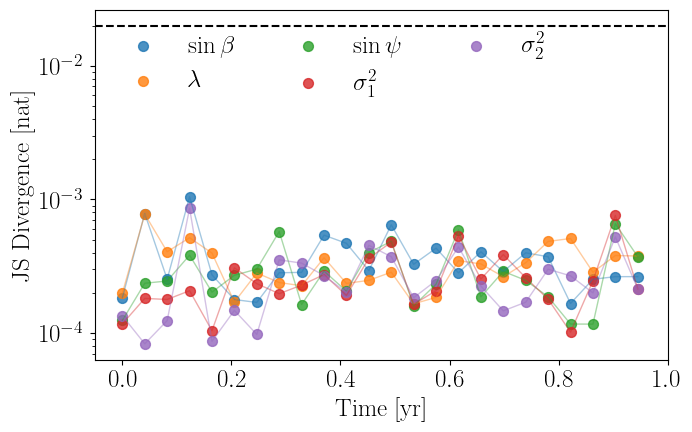

In [6]:
chunk = 15 * 86400
time = np.arange(0, 15 * 86400 * 24, chunk)
year = 31536000

plt.figure(figsize=rect_size, layout="constrained")
for i in range(len(label)):
    if label[i] in ["lat", "long", "psi", "s1", "s2"]:
        plt.plot(
            time / year,
            np.array(js_tot)[:, i],
            linestyle="-",
            linewidth=1.0,
            alpha=0.4,
            label="__nolegend__",
        )
        plt.scatter(
            time / year,
            np.array(js_tot)[:, i],
            marker="o",
            s=50,
            alpha=0.8,
            label=label_plot[i],
        )

plt.ylabel("JS Divergence [nat]")
plt.axhline(0.02, color="black", linewidth=1.5, linestyle="--")
plt.legend(
    loc="upper left",
    frameon=False,
    ncol=3,
)
plt.xlim(-0.05, 1)
plt.xlabel("Time [yr]")
plt.semilogy()
plt.savefig("../plots/Figure4.pdf", bbox_inches="tight")